###**1. Import Modules**

Let's import all of the modules that will help us accomplish the tasks

In [ ]:
# Import Dependencies
import pandas as pd
import numpy as np

%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV
%pip install imblearn
from imblearn.over_sampling import RandomOverSampler

### **2. Upload File**

I obtained the data from the Kaggle website and I stored in my Google drive. I am using a module to import it from my drive.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [66]:
# Import our Kaggle train Data Set
train_df = pd.read_csv('/content/drive/MyDrive/CodeAlpha Data Analysis Internship/Titanic Classification Dataset/train.csv')
# The Link to the training file:
# https://drive.google.com/file/d/1yQaqtSwDcwU1GbbhlvsF3GtHNPHD1yM8/view?usp=drive_link

### **3. Data Overview**

Let us take a first look at our data to know what columns and and how many rows we have. Also check if we have missing values

We have 12 Columns (information) and and 891 rows (passengers).

<u>Variable notes:</u>

* **Pclass**: A proxy for socio-economic status (SES)

    1st = Upper <br>
    2nd = Middle <br>
    3rd = Lower
*   **sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
*   **parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
* **Embarked**: The ports they embarked from.

    C = Cherbourg <br>
    Q = Queenstown <br>
    S = Southampton

In [ ]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### **4. Data Cleaning**

We need to check for missing values and substitute them with appropriate techinques.

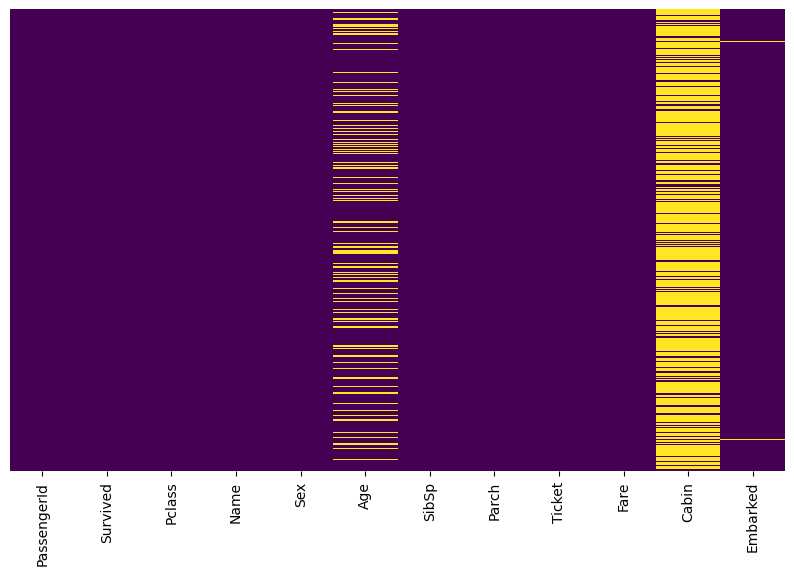

In [ ]:
# plot a heatmap of missing values

plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

We display the count of missing values for each feature.

In [ ]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


There are 177 missing values in the Age column, 687 in the Cabin column, and 2 in the Embarked column.

We will fill the missing values in the Age column with the median value and the missing values in the Embarked column with the most frequent value.

Due to the high number of missing values in the Cabin column and the difficulty in substituting them, we will remove this column entirely.

In [68]:
# Delete the 'Cabin' column
train_df = train_df.drop('Cabin', axis=1)

# Fill missing 'Age' values with the median
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

# Fill missing 'Embarked' values with the mode
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

# Let us verify if the missing values have been correctly handled
print(train_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


We have handled mising values appropriately.

Now let us converting our features (columns) to the right data type.

In [69]:
# Converting all columns to the right data type

# Convert 'Embarked' to category
train_df['Embarked'] = train_df['Embarked'].astype('category')

# Convert 'Sex' to category
train_df['Sex'] = train_df['Sex'].astype('category')

# Check the data types of the columns after conversion
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(2), float64(2), int64(5), object(2)
memory usage: 64.8+ KB
None


We will be removing the Passenger ID and Ticket fields from our analysis, as they do not contribute to predicting survival status. While further exploration of Ticket data could reveal patterns, that topic will not be addressed in this session.

In [70]:
# drop passengerID, name, Ticket and cabin
train_df = train_df.drop(['PassengerId', 'Ticket'], axis=1)

Let's check for any duplicate entries.

In [71]:
# Check for duplicates
duplicate_rows = train_df[train_df.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))
duplicate_rows

Number of duplicate rows: 0


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked


We do not have any duplicated rows.

### **5. Exploratory Data Analysis**

#### **A. Value Count**

Let's take a closer look at the number of passengers in various categories.

In [ ]:
# Number of females vs males
print(train_df['Sex'].value_counts())

# Pclass distribution
print(train_df['Pclass'].value_counts())

# Embarked distribution
print(train_df['Embarked'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


The data shows that the majority of passengers are **male**, from **Southampton**, and traveling in **third class**.

Now, let us explore the features related to their survival.

#### **B. Charts**

In [67]:
train_df_copy = train_df.copy()

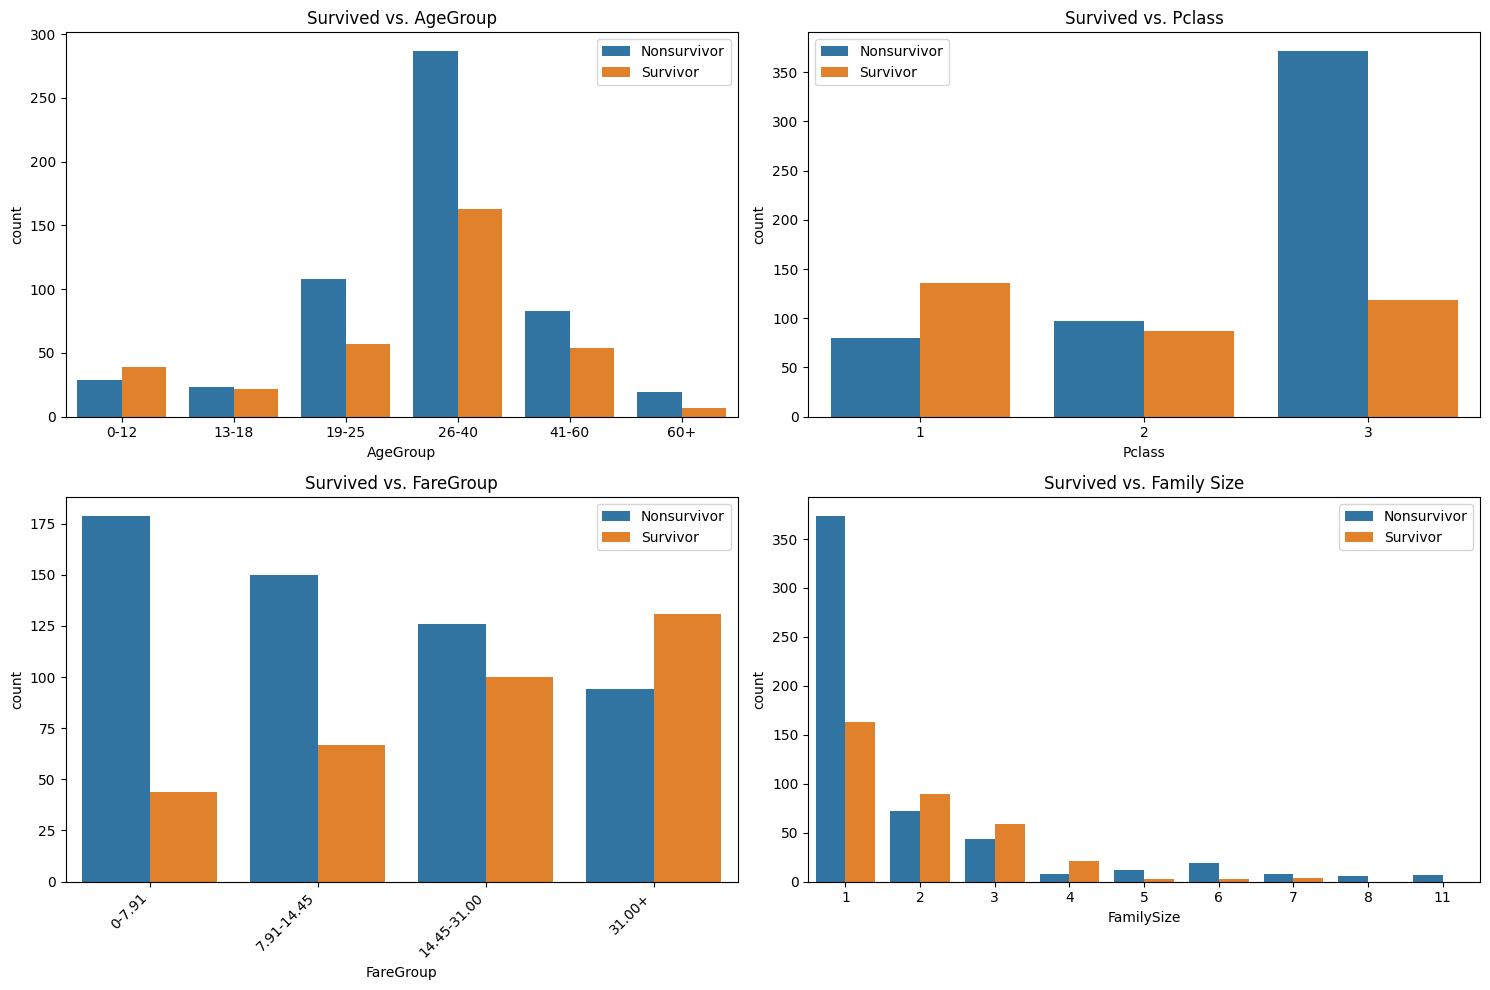

In [85]:
# Import Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate family size
train_df_copy['FamilySize'] = train_df_copy['SibSp'] + train_df_copy['Parch'] + 1

# Define age bins and labels
age_bins = [0, 12, 18, 25, 40, 60, np.inf]
age_labels = ['0-12', '13-18', '19-25', '26-40', '41-60', '60+']

# Categorize age
train_df_copy['AgeGroup'] = pd.cut(train_df_copy['Age'], bins=age_bins, labels=age_labels, right=False)

# Categorize fare and enforce order (IMPROVED)
fare_bins = [0, 7.91, 14.45, 31.00, np.inf]
fare_labels = ['0-7.91', '7.91-14.45', '14.45-31.00', '31.00+']
train_df_copy['FareGroup'] = pd.cut(
    train_df_copy['Fare'], bins=fare_bins, labels=fare_labels, right=False, include_lowest=True, duplicates='drop'
).cat.as_ordered()

# Plotting
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='AgeGroup', hue='Survived', data=train_df_copy)
plt.title('Survived vs. AgeGroup')
plt.legend(labels=['Nonsurvivor', 'Survivor'])

plt.subplot(2, 2, 2)
sns.countplot(x='Pclass', hue='Survived', data=train_df_copy)
plt.title('Survived vs. Pclass')
plt.legend(labels=['Nonsurvivor', 'Survivor'])

plt.subplot(2, 2, 3)
sns.countplot(x='FareGroup', hue='Survived', data=train_df_copy, order=train_df_copy['FareGroup'].cat.categories)  # Specify order
plt.title('Survived vs. FareGroup')
plt.xticks(rotation=45, ha='right')
plt.legend(labels=['Nonsurvivor', 'Survivor'])

plt.subplot(2, 2, 4)
sns.countplot(x='FamilySize', hue='Survived', data=train_df_copy)
plt.title('Survived vs. Family Size')
plt.legend(labels=['Nonsurvivor', 'Survivor'])

plt.tight_layout()
plt.show()

In [88]:
# Calculate survival percentage for each age group
age_survival_rates = train_df_copy.groupby('AgeGroup')['Survived'].mean() * 100
print("Survival Percentage by Age Group:\n", age_survival_rates)

# Calculate survival percentage for each Pclass
pclass_survival_rates = train_df_copy.groupby('Pclass')['Survived'].mean() * 100
print("\nSurvival Percentage by Pclass:\n", pclass_survival_rates)

# Calculate survival percentage for each FareGroup
fare_survival_rates = train_df_copy.groupby('FareGroup')['Survived'].mean() * 100
print("\nSurvival Percentage by FareGroup:\n", fare_survival_rates)

# Calculate survival percentage for each FamilySize
family_survival_rates = train_df_copy.groupby('FamilySize')['Survived'].mean() * 100
print("\nSurvival Percentage by FamilySize:\n", family_survival_rates)

Survival Percentage by Age Group:
 AgeGroup
0-12     57.352941
13-18    48.888889
19-25    34.545455
26-40    36.222222
41-60    39.416058
60+      26.923077
Name: Survived, dtype: float64

Survival Percentage by Pclass:
 Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

Survival Percentage by FareGroup:
 FareGroup
0-7.91         19.730942
7.91-14.45     30.875576
14.45-31.00    44.247788
31.00+         58.222222
Name: Survived, dtype: float64

Survival Percentage by FamilySize:
 FamilySize
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: Survived, dtype: float64


<ipython-input-88-0c1f6d0d250d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival_rates = train_df_copy.groupby('AgeGroup')['Survived'].mean() * 100
<ipython-input-88-0c1f6d0d250d>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival_rates = train_df_copy.groupby('FareGroup')['Survived'].mean() * 100


We can identify the group with the **highest chance of survival**:

1. Children
2. First Class passengers (Parlor Suite or First Class Suite)
3. Passengers who purchased first-class tickets (at least £30)
4. Small families of 2 to 4 members

Conversely, the group with the **lowest chance of survival** includes:

1. Elderly passengers
2. Third Class passengers
3. Passengers who bought third-class tickets (£3 - £7)
4. Large families of 8 or more members.

#### **C. Summary Statistics**

We can print a table of statistical information about all of our numeric functions, such as the Mean, Standard Deviation, First Quartile, Third Quartile, and Interquartile Range.

In [ ]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Let's calculate and display the mode, or the most frequent value, for each numerical feature.

In [ ]:
# Mode Values
train_df.mode()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,24.0,8.05,S,1


We will calculate and display the median value for each numerical feature.

In [ ]:
# Median values
train_df.median(numeric_only=True)

,0
Survived,0.0000
Pclass,3.0000
Age,28.0000
Fare,14.4542
FamilySize,1.0000


### **6. Feature Engineering**

#### **A. Extracting Information**

We will now extract important information from three features: **Name**, **SibSp**, and **Parch**.

First, we will extract the titles of the passengers from their names and then group related titles.

In [53]:
# A function that extracts title from name

def extract_title(name):
    """Extracts the title from a name string."""
    return name.split(',')[1].split('.')[0].strip()

# Apply the function to the 'Name' column and create a new 'Title' column
train_df['Title'] = train_df['Name'].apply(extract_title)

# Define title groups and their ranks
title_mapping = {
    "Mr": "Mr",
    "Miss": "Miss",
    "Mrs": "Mrs",
    "Master": "Master",
    "Dr": "Doctor",
    "Rev": "Clergy",
    "Col": "Officer",
    "Major": "Officer",
    "Mlle": "Nobility",  # Mademoiselle
    "Mme": "Nobility",  # Madame
    "the Countess": "Nobility",
    "Ms": "Nobility",
    "Lady": "Nobility",
    "Sir": "Nobility",
    "Capt": "Officer",
    "Jonkheer": "Nobility",
    "Don": "Nobility",
    "Dona": "Nobility"
}


# Map titles to their corresponding groups
train_df['TitleGroup'] = train_df['Title'].map(title_mapping)

Next, we will group SibSp (Siblings/Spouse) and Parch (Parents/Children) since they are related. We will add 1 (the individual) to create a feature called Family Size.

In [54]:
# Combine 'SibSp' and 'Parch'
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

Let's take a look at our updated colum

In [55]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,TitleGroup,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,Mr,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,Mrs,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,Miss,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,Mrs,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,Mr,1


#### **B. One Hot Encoding**

Since our classification models only understand numeric values, we need to convert categorical features into numbers.

For categorical features that have a specific order or rank, such as "good, better, excellent," we will use **Label Encoding** to assign them ascending numeric values.

However, for features that do not have a rank, such as "red, blue, yellow," we will use **One-Hot Encoding**. This method creates a separate column for each category, placing a 1 in the appropriate column and 0s in the others.

In our case, the categorical features **Embarked** and **Sex** do not have ranks, so we will apply **One-Hot Encoding** to them.

In [56]:
# Create the OneHotEncoder object
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the 'Embarked' and 'Sex' columns
encoded_features = enc.fit_transform(train_df[['Embarked', 'Sex', 'TitleGroup']])

# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=enc.get_feature_names_out(['Embarked', 'Sex', 'TitleGroup']))

# Drop the original 'Embarked' and 'Sex' columns from train_df
dropped_df = train_df.drop(['Embarked', 'Sex', 'TitleGroup'], axis=1)

# Concatenate the encoded DataFrame with train_df
one_hot_encoded__df = pd.concat([dropped_df, encoded_df], axis=1)

In [57]:
one_hot_encoded__df

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Title,FamilySize,Embarked_C,...,Sex_female,Sex_male,TitleGroup_Clergy,TitleGroup_Doctor,TitleGroup_Master,TitleGroup_Miss,TitleGroup_Mr,TitleGroup_Mrs,TitleGroup_Nobility,TitleGroup_Officer
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,Mr,2,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,Mrs,2,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,Miss,1,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,Mrs,2,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,Mr,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.0,0,0,13.0000,Rev,1,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
887,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,30.0000,Miss,1,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,23.4500,Miss,4,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
889,1,1,"Behr, Mr. Karl Howell",26.0,0,0,30.0000,Mr,1,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Let us drop columns that we will not use in our model building. These include Name, SibSp, Parch, Title

In [58]:
# Drop 'Name', 'SibSp', and 'Parch' Title columns
one_hot_encoded__df = one_hot_encoded__df.drop(['Name', 'SibSp', 'Parch', 'Title'], axis=1)

We can create a heatmap to visualize the correlation analysis of the one-hot encoded DataFrame.

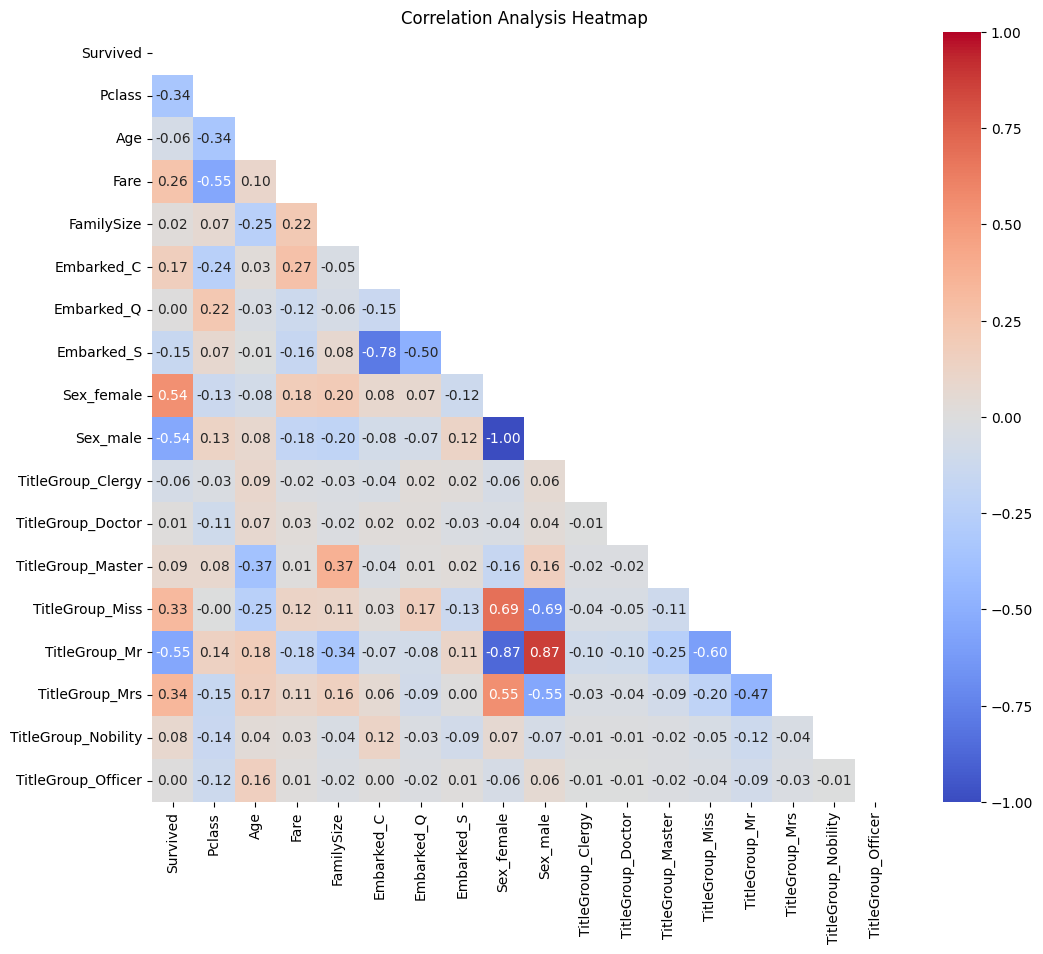

In [97]:
# Calculate the correlation matrix
corr_matrix = one_hot_encoded__df.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", vmin=-1, vmax=1, center=0, cmap='coolwarm')

plt.title("Correlation Analysis Heatmap")
plt.show()

### **7. Separate Target Variable from Predictors**

We will also separate the "Survived" column from the other columns in order to train the model. This separation allows the model to learn patterns without being influenced by the target variable. By keeping the "Survived" column aside, we can compare the model's predictions with the actual outcomes to evaluate its performance. We will denote the "Survived" column as **y** and the other predictor variables as **X**.

In [59]:
# Separate the features (predictors) from the target variable (Attrition)
X = one_hot_encoded__df.drop(['Survived'], axis=1)
y = one_hot_encoded__df['Survived']

### **8. Training, Validation, and Test Data Split**

To ensure our model is unbiased, we typically split our data into two parts: the Training set and the Test set.

The **Training data** is the portion of the dataset used to train the model, helping it identify hidden features and patterns.

The **Test data** is a separate set used to evaluate the model after the training process is complete.

The percentage of the split varies based on the size of the data and the objectives of our model building. Common splits include:

* 70% Training, 30% Testing
* 80% Training, 20% Testing

For this project, we will use an **80% Training and 20% Testing** split.

Also **Stratified sampling**. This technique consists of forcing the distribution of the target variable(s) among the different splits to be the same.

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42  # For reproducibility
)

### **9. Feature Scaling**

Our features have varying ranges; for example, 'Fare' has a much larger scale compared to others that range from 0 to 1. This can cause the model to overemphasize larger features.

To address this, we use **Robust Scaler**, a machine learning algorithm that scales data using statistics that are resistant to outliers. It does this by removing the median and scaling the data using the interquartile range (IQR).

In [61]:
# Initialize RobustScaler
scaler = RobustScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

#### **10. Solving Training Data Imbalance**

Due to the large number of Nuon survivors compared to the smaller group of other survivors, there is a class imbalance that negatively affects the model's generalization. As a result, the model tends to give more weight to the class with a larger number of samples.

To address this issue, we employ minority oversampling techniques, which involve increasing the number of samples in the minority class to better align with the majority class.

By doing this, we ensure that the model treats each class equally.

We will be using a technique known as **SMOTE**, which stands for Synthetic Minority Oversampling Technique.

Let us check for class imbalance before using a oversampling technique.

In [62]:
y_train.value_counts()

,count
Survived,
0,439
1,273


The amount of difference in values between the two classes in our training data is 166. Let us solve that.

In [63]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Oversample the minority class ('1') to match the majority class ('0')
# X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)
X_train_resample, y_train_resample = smote.fit_resample(X_train_scaled, y_train)

# Print the value counts of the resampled target variable
print(y_train_resample.value_counts())

Survived
1    439
0    439
Name: count, dtype: int64


Our training data for the Survival and Non-survival classes is now balanced, with both sets containing 439 entries.

### **11. Performance Evaluation**

We start by training our model with the training data and then evaluate its performance by making predictions on the test set. We will experiment with various classification models and choose the one that achieves the highest accuracy and the best overall F1 score.

Classification models are used to predict outcomes between two classes.

#### **A. Train Our Models And Predict On The Test Set**

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVM": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train the model
    y_pred = model.predict(X_test_scaled)  # Make predictions

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Print the results
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

Model: Logistic Regression
Accuracy: 0.8156
Precision: 0.7903
Recall: 0.7101
F1 Score: 0.7481
Confusion Matrix:
[[97 13]
 [20 49]]

Model: SVM
Accuracy: 0.8324
Precision: 0.8000
Recall: 0.7536
F1 Score: 0.7761
Confusion Matrix:
[[97 13]
 [17 52]]

Model: Decision Tree
Accuracy: 0.7989
Precision: 0.7391
Recall: 0.7391
F1 Score: 0.7391
Confusion Matrix:
[[92 18]
 [18 51]]

Model: KNN
Accuracy: 0.7989
Precision: 0.7705
Recall: 0.6812
F1 Score: 0.7231
Confusion Matrix:
[[96 14]
 [22 47]]

Model: Naive Bayes
Accuracy: 0.7263
Precision: 0.6042
Recall: 0.8406
F1 Score: 0.7030
Confusion Matrix:
[[72 38]
 [11 58]]

Model: XGBoost
Accuracy: 0.8045
Precision: 0.7500
Recall: 0.7391
F1 Score: 0.7445
Confusion Matrix:
[[93 17]
 [18 51]]

Model: Random Forest
Accuracy: 0.8045
Precision: 0.7576
Recall: 0.7246
F1 Score: 0.7407
Confusion Matrix:
[[94 16]
 [19 50]]

Model: AdaBoost
Accuracy: 0.8156
Precision: 0.7500
Recall: 0.7826
F1 Score: 0.7660
Confusion Matrix:
[[92 18]
 [15 54]]

Model: Gradient Boo

**Support Vector Classifier or SVC in short** has the highest accuracy of **83.2%**.

It also has:
* **Precision: 0.8**, Formula: (True Positives) / (True Positives + False Positives)
Answers the question: "Out of all the predictions labeled as positive, how many were actually positive?"
* **Recall: 0.7536**, Formula: (True Positives) / (True Positives + False Negatives)
Answers the question: "Out of all the actual positive cases, how many did the model correctly identify?"
* **F1-score: 0.7761**, Formula: (2 * Precision * Recall) / (Precision + Recall)
Represents a balance between precision and recall, giving a single metric to evaluate model performance when both are important.
* **Confusion Matrix:**

    [[97 13]

    [17 52]]

We will choose this model and perform hyperparameter tuning.

**Hyperparameter tuning** is the process of selecting the optimal values for a machine learning model's hyperparameters.

#### **B. Perform Hyperparameter Tuning**

This creates a grid of the models parameters' and trains the data on all of their cobination to find the best set of parameters that result in higher accuracy.

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Define the parameter grid for SVC
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Create an SVC model
svc_model = SVC(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, y_train)


# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_svc = grid_search.best_estimator_

# Make predictions on the test set using the best estimator
y_pred = best_svc.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


# Print the results
print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix:\n{cm}\n")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy: 0.8324
Precision: 0.8000
Recall: 0.7536
F1 Score: 0.7761
Confusion Matrix:
[[97 13]
 [17 52]]



The metrics have not change so will retain the orginal scores.

This is the process of building a machine learning model. It has been a valuable learning experience. There are always ways to explore and improve performance, such as:

- Exploring additional feature engineering techniques
- Investigating other classification models
- Performing more extensive hyperparameter tuning
- Examining the impact of different data preprocessing methods

Thank you, CodeAlpha, for this opportunity, and thank you to everyone viewing this code/notebook.